# Import 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Files

In [2]:
senior_data = pd.read_csv("C:\\CSE\\bonus task\\Seniors.csv")
#drop non numeric columns
print(senior_data)

      Unnamed: 0  Temperature (°C)  Pressure (kPa)  Temperature x Pressure  \
0              0        209.762701        8.050855             1688.769167   
1              1        243.037873       15.812068             3842.931469   
2              2        220.552675        7.843130             1729.823314   
3              3        208.976637       23.786089             4970.736918   
4              4        184.730960       15.797812             2918.345014   
...          ...               ...             ...                     ...   
2495        2495        194.332813       22.269402             4327.675524   
2496        2496        240.467829       15.981486             3843.033197   
2497        2497        244.866196       24.901641             6097.570183   
2498        2498        138.314203       10.700640             1480.050534   
2499        2499        232.434847        6.374536             1481.664374   

      Material Fusion Metric  Material Transformation Metric  Q

# Devide data into test and train

In [3]:

# Shuffle the data
data = senior_data.sample(frac=1, random_state=42).reset_index(drop=True)
fraction = 0.7
# Split data into 80% train and 20% test
split_index = int(fraction * len(data))
train_data = data.iloc[:split_index]
test_data = data.iloc[split_index:]

print("Training Data:\n", train_data)
print("Testing Data:\n", test_data)


Training Data:
       Unnamed: 0  Temperature (°C)  Pressure (kPa)  Temperature x Pressure  \
0           1447        241.810162       11.933337             2885.602109   
1           1114        188.274829       10.744049             2022.834030   
2           1064        202.244358       15.711003             3177.461635   
3           2287        280.312564       21.223911             5949.328975   
4           1537        281.298825       22.921045             6447.663036   
...          ...               ...             ...                     ...   
1745        1424        159.750062       11.145263             1780.456395   
1746         183        147.578564       18.059340             2665.171422   
1747         137        230.640164        9.560922             2205.132609   
1748         899        183.338351       24.435022             4479.876581   
1749         796        178.359388       10.277340             1833.060158   

      Material Fusion Metric  Material Transfor

# Correlation Table 
drop irrelevant columns which have low coorelation with quality rating

                                Temperature (°C)  Pressure (kPa)  \
Temperature (°C)                        1.000000        0.020525   
Pressure (kPa)                          0.020525        1.000000   
Temperature x Pressure                  0.587414        0.788911   
Material Fusion Metric                  0.976774        0.185797   
Material Transformation Metric          0.970817        0.005353   
Quality Rating                         -0.463365        0.023628   

                                Temperature x Pressure  \
Temperature (°C)                              0.587414   
Pressure (kPa)                                0.788911   
Temperature x Pressure                        1.000000   
Material Fusion Metric                        0.703692   
Material Transformation Metric                0.560461   
Quality Rating                               -0.241878   

                                Material Fusion Metric  \
Temperature (°C)                              0.976774   


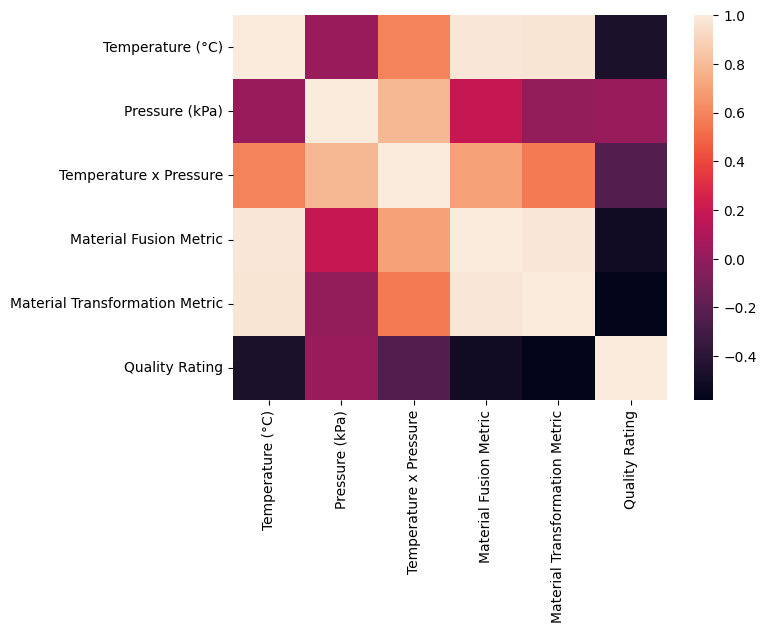

In [4]:
test_data = test_data.drop(columns="Unnamed: 0", errors="ignore")
train_data = train_data.drop(columns="Unnamed: 0", errors="ignore")

numeric_columns = test_data.select_dtypes(include=[np.number]).columns
numeric_columns = test_data.columns
senior_file_numeric = test_data[numeric_columns]
correlation_matrix = senior_file_numeric.corr()
print(correlation_matrix)

plt.figure(figsize=(7, 5))  # Adjust the size of the plot
sns.heatmap(correlation_matrix)
plt.show()

columns_to_drop = ['Pressure (kPa)','Quality Rating']
columns = train_data.columns
columns = [item for item in columns if item not in columns_to_drop]


# Select relevant features

In [5]:
x_train=train_data[columns]
x_test = test_data[columns]

y_train = train_data['Quality Rating']
y_test = test_data['Quality Rating']

print(f"Features : \n {x_train}")


Features : 
       Temperature (°C)  Temperature x Pressure  Material Fusion Metric  \
0           241.810162             2885.602109            60171.515622   
1           188.274829             2022.834030            36687.646073   
2           202.244358             3177.461635            44780.814973   
3           280.312564             5949.328975            88135.537879   
4           281.298825             6447.663036            91171.157082   
...                ...                     ...                     ...   
1745        159.750062             1780.456395            26904.512097   
1746        147.578564             2665.171422            27669.301161   
1747        230.640164             2205.132609            54068.860862   
1748        183.338351             4479.876581            48202.376339   
1749        178.359388             1833.060158            32897.602198   

      Material Transformation Metric  
0                       1.413902e+07  
1                   

# Add higher order to features


In [6]:
def higher_order(x, order, feature):
    x = x.copy()
    for i in range(2, order+1):
        x[f'{feature}^{i}'] = x[feature] ** i 
    return x 

order = 5
x_train = higher_order(x_train, order, 'Temperature (°C)')
x_train =higher_order(x_train, order, 'Temperature x Pressure')
x_train =higher_order(x_train,order, 'Material Fusion Metric')
x_train =higher_order(x_train,order, 'Material Transformation Metric')

x_test =higher_order(x_test, order, 'Temperature (°C)')
x_test =higher_order(x_test, order, 'Temperature x Pressure')
x_test =higher_order(x_test, order, 'Material Fusion Metric')
x_test =higher_order(x_test, order, 'Material Transformation Metric')

print(x_train.columns)


Index(['Temperature (°C)', 'Temperature x Pressure', 'Material Fusion Metric',
       'Material Transformation Metric', 'Temperature (°C)^2',
       'Temperature (°C)^3', 'Temperature (°C)^4', 'Temperature (°C)^5',
       'Temperature x Pressure^2', 'Temperature x Pressure^3',
       'Temperature x Pressure^4', 'Temperature x Pressure^5',
       'Material Fusion Metric^2', 'Material Fusion Metric^3',
       'Material Fusion Metric^4', 'Material Fusion Metric^5',
       'Material Transformation Metric^2', 'Material Transformation Metric^3',
       'Material Transformation Metric^4', 'Material Transformation Metric^5'],
      dtype='object')


# Z scale all values


In [7]:
#Z scale down
m = x_train.shape[1] # m is the number of columns
x_train  = x_train.values
for i in range(m):
    x_train[:,i] = (x_train[:,i] - np.mean(x_train[:,i])) / np.std(x_train[:,i])

y_train = (y_train - np.mean(y_train) )/ np.std(y_train)

m = x_test.shape[1] # m is the number of columns
x_test  = x_test.values
for i in range(m):
    x_test[:,i] = (x_test[:,i] - np.mean(x_test[:,i])) / np.std(x_test[:,i])

y_test = (y_test - np.mean(y_test) )/ np.std(y_train)


print(f"\nAfter scaleing TRAIN data: \n {x_train}")
print(f"\nQuality Rateing TRAIN data :{y_train}")

print(f"\n \nAfter scaleing TEST data: \n {x_test}")
print(f"\nQuality Rateing TEST data :{y_test}")


After scaleing TRAIN data: 
 [[ 0.70524319 -0.05678131  0.49224746 ... -0.06266058 -0.21707554
  -0.30086916]
 [-0.20829806 -0.6497015  -0.48337456 ... -0.57329047 -0.52659931
  -0.48063818]
 [ 0.03008172  0.14379334 -0.14714914 ... -0.51902354 -0.50460679
  -0.47233284]
 ...
 [ 0.51463536 -0.52442043  0.23871666 ... -0.26047139 -0.35812212
  -0.3943939 ]
 [-0.29253543  1.03885208 -0.00500261 ... -0.58606449 -0.53101643
  -0.48205696]
 [-0.37749779 -0.78011981 -0.64082946 ... -0.59642281 -0.53431946
  -0.48303535]]

Quality Rateing TRAIN data :0       0.297945
1       0.298786
2       0.298785
3      -0.117895
4      -0.184105
          ...   
1745    0.298786
1746    0.298786
1747    0.298670
1748    0.298786
1749    0.298786
Name: Quality Rating, Length: 1750, dtype: float64

 
After scaleing TEST data: 
 [[-1.2619707  -1.37059985 -1.33225725 ... -0.64441777 -0.54980455
  -0.48794983]
 [-0.63915289 -0.93307961 -0.8690274  ... -0.62870999 -0.54683596
  -0.48741245]
 [ 0.28282564 -0.3

# Define necessary functions


In [8]:
def function(w, b, x):
    return np.dot(x, w) + b

def cost_fun(w, b, x, y, lam):  # Cost function
    m = x.shape[0]  # Number of training examples(rows)
    total_cost = 0
    for i in range(m):
        total_cost += (function(w, b, x[i]) - y[i])**2    # Squared error
    sum_weights = np.sum(w**2) #sum of square of weights
    # Cost with regularization
    return (1 / (2 * m)) * (total_cost + lam * sum_weights)

def gradient_descent(w, b, x, y, a, iteration,lam):   
    cost_his = []
    for j in range(iteration):
        dj_dw = np.zeros_like(w)  # Initialize gradient for w
        dj_db = 0  # Initialize gradient for b
        
        F = function(w,b,x)
        dj_dw += np.dot((F - y),x)  
        dj_db = np.sum(F - y)
      
        w = w - (1/m) *a * (dj_dw + lam * w)
        b = b - (1/m) * a * dj_db
        cost = cost_fun(w,b,x,y,lam)
        cost_his.append(cost)
    return w, b,cost_his

def Rsquare(y,y_predict):
    ssr = np.sum((y-y_predict)**2)
    sst = np.sum((y - y.mean())**2)
    return 1-(ssr/sst)

# finding the best working model
Graphs,Coefficient of determination, cost functions for each itirations of lambda for a specific order is included. This is done to find the best fitting variables(lambda and order) for the given data.
previous errors - 
a (learning rate) cannot be more than 0.001 -  RuntimeWarning: overflow encountered in scalar add
  total_cost += (function(w, b, x[i]) - y[i])**2    # Squared error

for division in data - 0.7
Itirations = 6000
order = 5


for lambda value = 0

OUTPUT

Final value of 
w = [ 5.81699505e-01  1.92610514e-02  4.00689000e-02 -5.86850892e-01
 -3.48776413e-01 -5.86824506e-01 -3.46377189e-01  1.30452557e-01
 -2.46308218e-03 -5.47600356e-02 -1.51003018e-01 -2.93289389e-01
 -7.18606165e-02  5.07050227e-01  8.09427844e-01  4.41425935e-01
  6.43157242e-01  1.28547658e+00 -5.38807304e-02 -3.05115931e+00], 
b = 7.906342247565595e-16 
for a = 0.001

Final value of cost function = 0.024973941741823956

R square value for Train data  0.9500521165163521

R square value for Train data  0.14291940300114658


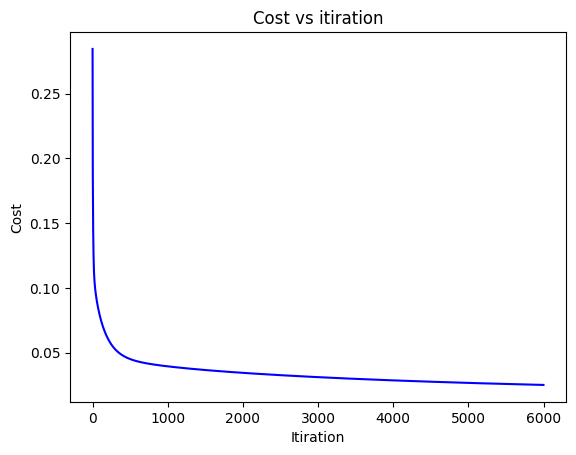

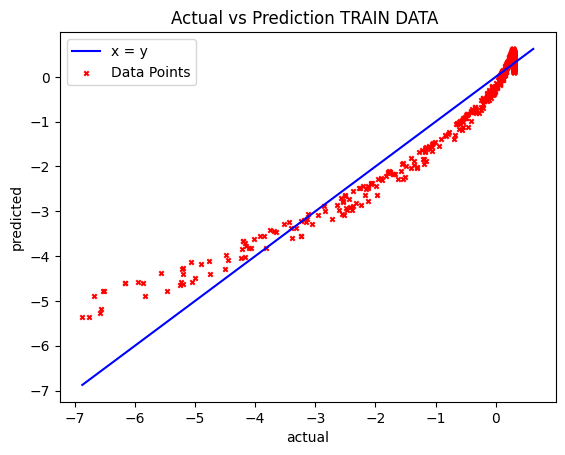

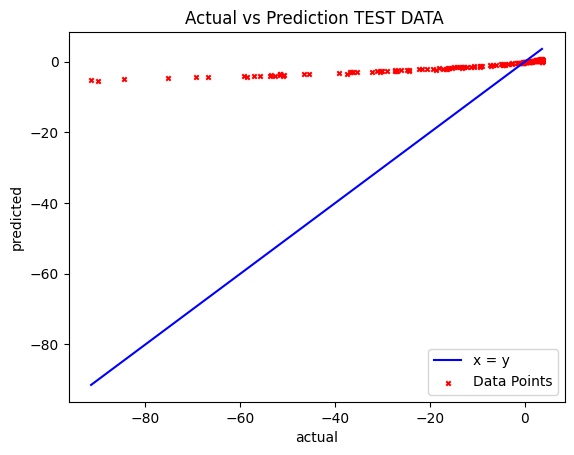



for lambda value = 1

OUTPUT

Final value of 
w = [ 4.54068023e-01  2.75800296e-02 -1.47333313e-03 -4.93716624e-01
 -3.18252739e-01 -4.93694971e-01 -2.63202506e-01  1.61081540e-01
 -3.95433653e-03 -5.56542043e-02 -1.41675712e-01 -2.66936908e-01
 -4.68883263e-02  4.81503644e-01  7.42543435e-01  4.02987614e-01
  6.05452435e-01  1.11183170e+00 -1.38897353e-01 -2.83542465e+00], 
b = 7.117195721661991e-16 
for a = 0.001

Final value of cost function = 0.029859069701184956

R square value for Train data  0.9469074956081711

R square value for Train data  0.1424502158108386


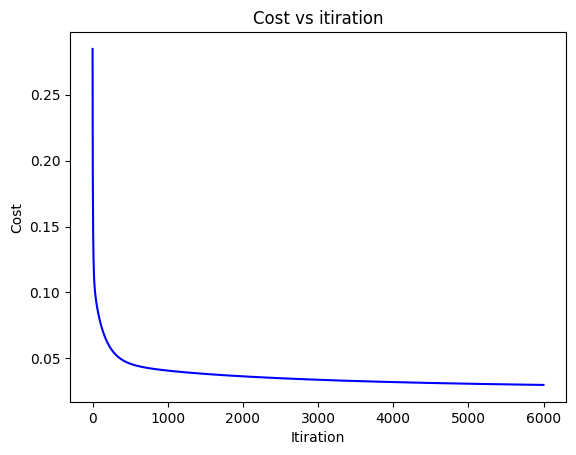

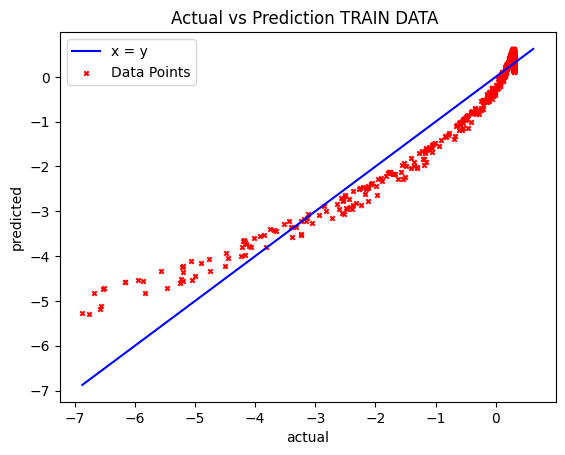

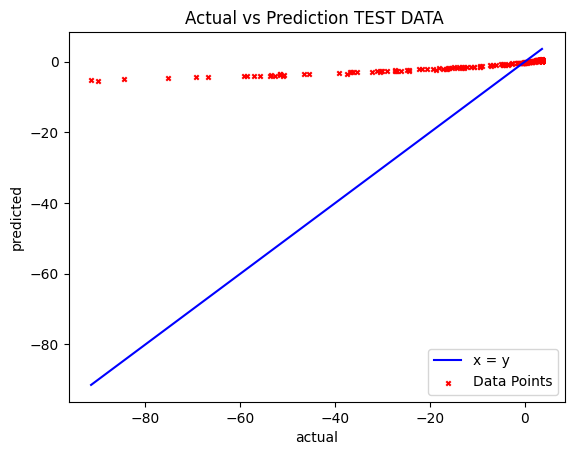



for lambda value = 2

OUTPUT

Final value of 
w = [ 0.34844114  0.03340062 -0.0342513  -0.41636122 -0.29247712 -0.41634341
 -0.19464139  0.18561436 -0.00494717 -0.05561535 -0.13316321 -0.24455913
 -0.02552806  0.45935924  0.68492501  0.36828961  0.57308387  0.96744796
 -0.20787884 -2.65301377], 
b = 6.652234318949013e-16 
for a = 0.001

Final value of cost function = 0.0336920513460096

R square value for Train data  0.9438975395132815

R square value for Train data  0.14202524747573553


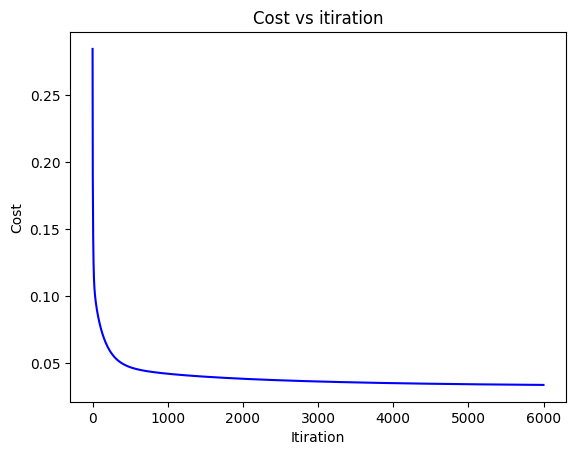

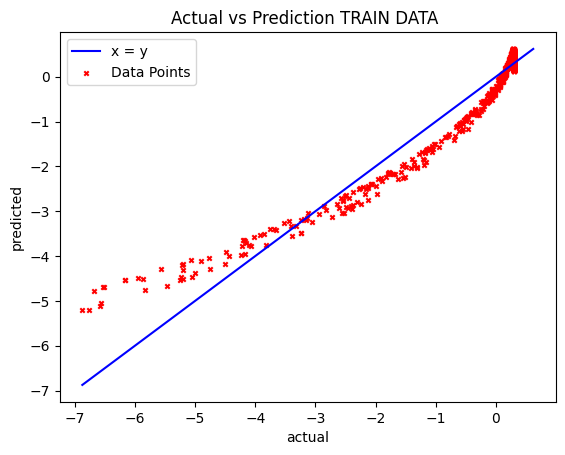

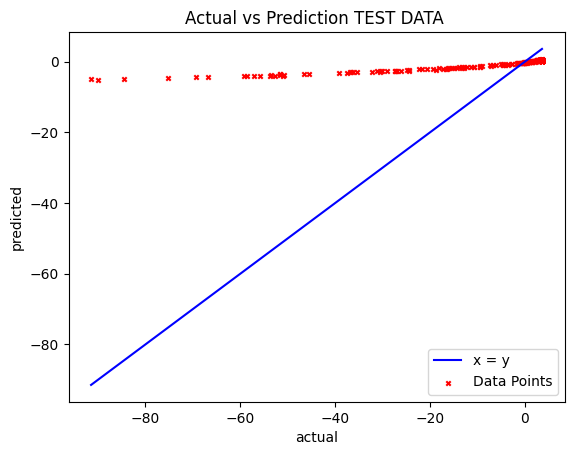

In [9]:

w = np.zeros(m)
b = 0
a = 0.001
ite = 6000
lam = 3

print(f"for division in data - {fraction}\nItirations = {ite}\norder = {order}")

for i in range(lam):
    print(f"\n\nfor lambda value = {i}")
    w, b,cost_his = gradient_descent(w, b, x_train, y_train, a, ite,i)
    final_cost = cost_fun(w, b, x_train, y_train,i)
    print("\nOUTPUT\n")
    print(f"Final value of \nw = {w}, \nb = {b} \nfor a = {a}\n")
    print(f"Final value of cost function = {final_cost}")   
    print(f"\nR square value for Train data  {Rsquare(y_train,function(w,b,x_train))}")
    print(f"\nR square value for Train data  {Rsquare(y_test,function(w,b,x_test))}")
    plt.plot(range(len(cost_his)),cost_his, color='blue')
    plt.xlabel("Itiration")
    plt.ylabel("Cost")
    plt.title("Cost vs itiration")
    plt.show()
    
    
    # X = y line for reference
    y_min = min(min(y_train),min(function(w,b,x_train)))
    y_max= max(max(y_train),max(function(w,b,x_train)))
    y = np.linspace(y_min,y_max, 500)  # Create 500 points between min and max value
    x = y  # x is equal to y
    plt.plot(x,y, color = 'blue', label = 'x = y')
    plt.scatter(y_train,function(w,b,x_train), color='red', marker='x', s=10, label='Data Points')
    plt.xlabel("actual")
    plt.ylabel("predicted")
    plt.title("Actual vs Prediction TRAIN DATA ")
    plt.legend()
    plt.show()
    
    
    y_min = min(min(y_test),min(function(w,b,x_test)))
    y_max= max(max(y_test),max(function(w,b,x_test)))
    y = np.linspace(y_min,y_max, 500)  # Create 500 points between min and max value
    x = y  # x is equal to y
    plt.plot(x,y, color = 'blue', label = 'x = y')
    plt.scatter(y_test,function(w,b,x_test), color='red', marker='x', s=10, label='Data Points')
    plt.xlabel("actual")
    plt.ylabel("predicted")
    plt.title("Actual vs Prediction TEST DATA ")
    plt.legend()
    plt.show()
    w = np.zeros(m)
    b = 0
    cost_his = []